# 2 Data Acquisition

In this chapter we will discuss data acquisition and data formatting for four online Assyriological projects: [ORACC](http://oracc.org) (2.1), [ETCSL](https://etcsl.orinst.ox.ac.uk/), (2.2) [CDLI](http://cdli.ucla.edu) (2.3) and [BDTNS](http://bdtns.filol.csic.es/) (2.4). 

The data in [CDLI](http://cdli.ucla.edu) and [BDTNS](http://bdtns.filol.csic.es/) are made available in raw-text format, with transliteration only. For instance:

Row
    [0] Markdown(str, height=300, sizing_mode='fixed', width=500)
    [1] JPG(str, height=300)
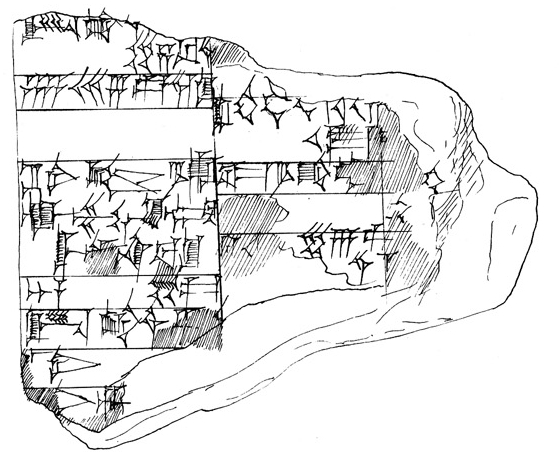

In [7]:
import json
import panel as pn
import ipywidgets as widgets
pn.extension()
with open('P100001.md', 'r', encoding='utf8') as m:
    P100001 = m.read()
#with open('P100001.txt', 'r', encoding='utf8') as m:
#    P100001 = m.read()
#atf = widgets.Textarea(
#    value = P100001, layout={'height': "200px"})
#atf
copy = pn.pane.JPG('../images/AAS13obvtop.jpg', height = 300)
atf = pn.pane.Markdown(P100001, height=300, width=500)
row = pn.Row(atf, copy)
row

This data format is easy to read for humans (those humans who know Sumerian), but less so for computers. It is necessary to tell the software which data elements belong to the text and which do not (for instance, line numbers and surface labels) and what the various non-textual elements mean. We will see examples of how such data sets may be used in the sections 2.3 ([CDLI](http://cdli.ucla.edu)) and 2.4 ([BDTNS](http://bdtns.filol.csic.es/)). Section 2.4 will also demonstrate code for constructing a search engine for [BDTNS](http://bdtns.filol.csic.es/) that ignores sign values - that is, searching for `luh` will also find `sukkal`, etc. The code uses both [BDTNS](http://bdtns.filol.csic.es/) data and the [ORACC Global Sign List](http://orac.org/ogsl), showing how data from different projects can be mashed into a single tool.

The data in [ORACC](http://oracc.org) and [ETCSL](https://etcsl.orinst.ox.ac.uk/) are made available in [JSON](http://json.org) and [XML](http://xml.org), respectively. Those formats are very explicit and atomistic. They are less easy to read for humans, but are very flexible for computational usage and, most importantly, allow for multiple levels of annotation (with e.g. lexical, morphological, and  graphemic information) at the same time. The data in [ORACC](http://oracc.org) and [ETCSL](https://etcsl.orinst.ox.ac.uk/) includes lemmatization, linking each word to an entry in a glossary. The following is an example of a JSON file, one may click on any of the lines with an arrow to expose more or less of the hierarchical structure. The usage of JSON and XML files will be discussed in sections 2.1 and 2.2.

In [2]:
with open('P100001.json', 'r', encoding='utf8') as p:
    P100001 = json.load(p)
json_object = pn.pane.JSON(P100001, name='P100001', depth=1, height=300, width=500, theme = 'light')
json_object

JSON(dict, height=300, name='P100001', sizing_mode='fixed', theme='light', width=500)

This represents the same text as the one shown in raw text format above ([P100001 = AAS 13](http://oracc.org/epsd2/P100001)), but in this case provided with lemmatization and explicit information on the various data types.

The Compass project mostly deals with [ORACC](http://oracc.org) data, and much of this chapter will provide code and explanations for how to extract the various types of information that are included in the JSON files. The parsing of the [ETCSL](https://etcsl.orinst.ox.ac.uk/ data ) XML (section 2.2) is, to some extent, redundant, because all of the [ETCSL](https://etcsl.orinst.ox.ac.uk/) data have been incorporated into [ORACC/epsd2/literary](http://oracc.org/epsd2/literary) and can be parsed with the tools for regular [ORACC](http://oracc.org) projects. 

The Chapters 3-6 of Compass will work with [ORACC](http://oracc.org) data and will parse that data with the tools demonstrated and explained in section 2.1. Chapter 2 is not absolutely necessary to follow along in those chapters. If, however, you wish to design your own computational project, you will to understand how the data is acquired and formatted.